#Autores: Andrés Hernández Acosta  - 2191077 Y Donovan Paul Seijas Polo -  2230667



In [ ]:
import numpy as np
# Leer los datos desde el archivo 'datosmasas.csv'
#  el archivo tiene un encabezado, por eso se omite la primera línea (skip_header=1)
# Se seleccionan las columnas 1, 2, 3 y 4 (índices base 0), que corresponden a masas y coordenadas x, y, z
data = np.genfromtxt('datosmasas.csv', delimiter=',', skip_header=1, usecols=(1, 2, 3, 4))

# Extraer la columna de masas (primera columna del arreglo leído)
masas = data[:, 0]
print(masas)  # Imprimir las masas para verificar los datos

# Extraer las coordenadas espaciales de las partículas
x = data[:, 1]  # Coordenadas en x
y = data[:, 2]  # Coordenadas en y
z = data[:, 3]  # Coordenadas en z

### Momento de orden cero: Masa total del sistema.

In [37]:
# 1. Cálculo del momento de orden cero, que corresponde a la masa total del sistema
momento_orden_cero = np.sum(masas)
print(f"Momento de orden cero (masa total del sistema): {momento_orden_cero:.2f}")

Momento de orden cero (masa total del sistema): 4627.00


### Momento de orden uno: Centro de masa

**CASO 2D**

In [38]:
# Extraer la coordenada x de todas las partículas
x = data[:, 1]
print(x)       # Mostrar las coordenadas x para revisión
print(masas)   # Mostrar las masas para revisión

# Cálculo de la coordenada x del centro de masa
# Se multiplica cada coordenada x por su masa correspondiente, se suman y se divide entre la masa total
x_cm = np.sum(x * masas) / momento_orden_cero
print(f"Coordenada x del centro de masa: {x_cm:.2f}")

# Extraer la coordenada y de todas las partículas
y = data[:, 2]

# Cálculo de la coordenada y del centro de masa
# Similar al caso anterior, usando las coordenadas y
y_cm = np.sum(y * masas) / momento_orden_cero
print(f"Coordenada y del centro de masa: {y_cm:.2f}")

[ -53.   13. -109. ... 1626. 1390. 1717.]
[2. 2. 2. ... 5. 2. 2.]
Coordenada x del centro de masa: 825.82
Coordenada y del centro de masa: 776.92


### Construcción del vector del centro de masa en 2D

In [63]:
# Se crea un arreglo numpy con las coordenadas x e y calculadas previamente
cm_2d = np.array([x_cm, y_cm])

# Imprimir el vector resultante del centro de masa en dos dimensiones
print("el centro de masas en dos dimenciones es: ")
print(cm_2d)

el centro de masas en dos dimenciones es: 
[825.81521504 776.91852172]


CASO 3D

In [62]:
# Extraer la coordenada z de todas las partículas
z = data[:, 3]

# Cálculo de la coordenada z del centro de masa
# Se multiplica cada coordenada z por su masa correspondiente, se suman y se divide entre la masa total
z_cm = np.sum(z * masas) / momento_orden_cero
print(f"Coordenada z del centro de masa: {z_cm:.2f}")

# Construcción del vector del centro de masa en 3D
# Se combinan las coordenadas x, y y z del centro de masa en un arreglo numpy
cm_3D = np.array([x_cm, y_cm, z_cm])

# Imprimir el vector del centro de masa en tres dimensiones
print("el centro de masas en tres dimenciones es: ")
print(cm_3D)

Coordenada z del centro de masa: 15.50
el centro de masas en tres dimenciones es: 
[825.81521504 776.91852172  15.5033499 ]


###MOMENTO DE ORDEN 2: Tensor de Inercia

In [66]:
# Cálculo de las coordenadas relativas al centro de masa (CM)
# Se resta la coordenada del CM a cada coordenada de las partículas para obtener las posiciones relativas
x_rel = x - x_cm
y_rel = y - y_cm
z_rel = z - z_cm

# Mostrar las coordenadas relativas para verificación
print(x_rel)
print(y_rel)
print(z_rel)

# Inicialización de la matriz de momento de inercia en 2D (2x2)
I = np.zeros((2, 2))

# Cálculo de los elementos diagonales de la matriz de inercia
# Ixx: suma de masas por el cuadrado de la distancia relativa en y
I[0, 0] = np.sum(masas * (y_rel ** 2))  # Momento de inercia respecto al eje x
# Iyy: suma de masas por el cuadrado de la distancia relativa en x
I[1, 1] = np.sum(masas * (x_rel ** 2))  # Momento de inercia respecto al eje y

# Cálculo de los productos de inercia (elementos fuera de la diagonal)
# Ixy = Iyx = - suma de masas por el producto de las distancias relativas en x y y
I[0, 1] = I[1, 0] = -np.sum(masas * x_rel * y_rel)


[-878.81521504 -812.81521504 -934.81521504 ...  800.18478496  564.18478496
  891.18478496]
[-697.91852172 -918.91852172 -879.91852172 ...  760.08147828  703.08147828
  687.08147828]
[-106.5033499 -192.5033499 -135.5033499 ...   80.4966501  144.4966501
  -74.5033499]


In [65]:
# Imprimir la matriz de momento de inercia resultante
print("Matriz de momento de inercia:")
print(I)

Matriz de momento de inercia:
[[ 9.63660148e+08 -9.11747911e+08]
 [-9.11747911e+08  9.58535589e+08]]


In [42]:
# Inicialización de la matriz de momento de inercia en 3D (3x3)
I3 = np.zeros((3, 3))

# Cálculo de los elementos diagonales (momentos de inercia principales)
# Ixx: suma de masas por la suma de los cuadrados de las distancias relativas en y y z
I3[0, 0] = np.sum(masas * (y_rel**2 + z_rel**2))

# Iyy: suma de masas por la suma de los cuadrados de las distancias relativas en x y z
I3[1, 1] = np.sum(masas * (x_rel**2 + z_rel**2))

# Izz: suma de masas por la suma de los cuadrados de las distancias relativas en x y y
I3[2, 2] = np.sum(masas * (x_rel**2 + y_rel**2))

# Cálculo de los productos de inercia (elementos fuera de la diagonal)
# Ixy = Iyx: producto de inercia respecto a x e y
I3[0, 1] = I3[1, 0] = -np.sum(masas * x_rel * y_rel)

# Ixz = Izx: producto de inercia respecto a x e z
I3[0, 2] = I3[2, 0] = -np.sum(masas * x_rel * z_rel)

# Iyz = Izy: producto de inercia respecto a y e z
I3[1, 2] = I3[2, 1] = -np.sum(masas * y_rel * z_rel)

# Mostrar la matriz de inercia 3D calculada
print("Matriz de momento de inercia en 3D:")
print(I3)

[[ 1.06550347e+09 -9.11747911e+08  7.14204864e+06]
 [-9.11747911e+08  1.06037891e+09  1.92959724e+06]
 [ 7.14204864e+06  1.92959724e+06  1.92219574e+09]]


### Encuentre los ejes principales de inercia para esta distribución de masas. Esto es aquellos vectores propios del tensor de inercia, que forma una base ortogonal respecto a la cual la distribución de las masas se organiza de forma mas simple.

###Problema de autovectores y autovalores caso 2D

In [44]:
# Cálculo de autovalores y autovectores de la matriz de inercia 2D
# Se utiliza 'np.linalg.eigh' que está optimizado para matrices simétricas
autovalores, autovectores = np.linalg.eigh(I)

# Mostrar los autovalores, que corresponden a los momentos principales de inercia
print("\nAutovalores (momentos principales de inercia):")
print(autovalores)

# Mostrar los autovectores, que representan las direcciones de los ejes principales de inercia
print("\nAutovectores (ejes principales de inercia):")
print(autovectores)


Autovalores (momentos principales de inercia):
[4.93463569e+07 1.87284938e+09]

Autovectores (ejes principales de inercia):
[[-0.7061125  -0.70809967]
 [-0.70809967  0.7061125 ]]


###Problema de autovectores y autovalores caso 3D

In [46]:
# Cálculo de autovalores y autovectores de la matriz de inercia 3D
# 'np.linalg.eigh' se utiliza para matrices simétricas como el tensor de inercia
autovalores3, autovectores3 = np.linalg.eigh(I3)

# Imprimir los autovalores, que corresponden a los momentos principales de inercia en 3D
print("\nAutovalores (momentos principales de inercia):")
print(autovalores3)

# Imprimir los autovectores, que definen las direcciones de los ejes principales de inercia
print("\nAutovectores (ejes principales de inercia):")
print(autovectores3)


Autovalores (momentos principales de inercia):
[1.51166481e+08 1.92196006e+09 1.97495158e+09]

Autovectores (ejes principales de inercia):
[[-0.70611307  0.04694255  0.70654139]
 [-0.70808985 -0.05190995 -0.7042117 ]
 [ 0.00361904 -0.99754787  0.06989384]]



¿Los vectores base del sistema cartesiano constituyen una base propia para esta distribución de masa? Esto es: ¿Los vectores cartesianos son autovectores del tensor momento de inercia?
RTA: Los vectores cartesianos estándar **serán autovectores** del tensor de inercia **si y solo si** el tensor es diagonal (es decir, si los productos de inercia son cero):
$$I_{xy} = I_{xz} = I_{yz} = 0.$$
Esto ocurre cuando:
1. **Simetría en la distribución de masa**: La distribución tiene simetrías alineadas con los ejes cartesianos (ejes principales naturales). Por ejemplo:
   - Un elipsoide alineado con los ejes \(x\), \(y\), \(z\).
   - Una distribución con simetría esférica, cilíndrica (respecto a un eje cartesiano), o planos de simetría perpendiculares a los ejes.
2. **Sistema de coordenadas coincidente**: El sistema cartesiano está alineado con los ejes principales de inercia.


Como vimos anteriormente los ejes principales estan dados por otros vectores y no presisamente por los vectores cartesianos por tanto **NO SE CUMPLE**.



# Gráfica en 2D de los ejes principales de inercia y su centro de masas

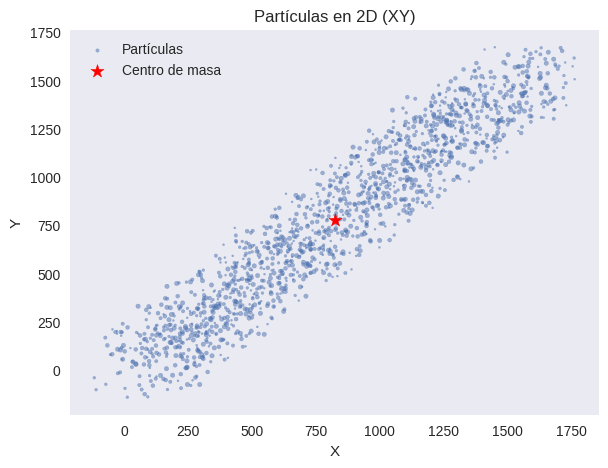

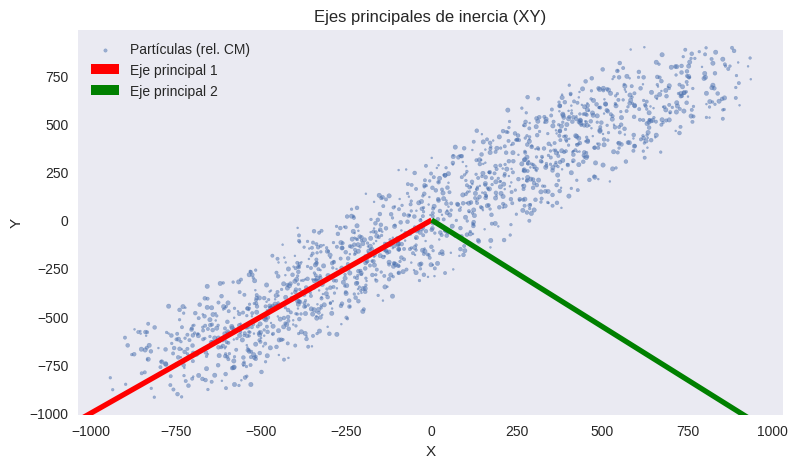

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

# Escalar los ejes principales por los autovalores para visualización
eje1 = autovectores3[:, 0] * autovalores3[0]
eje2 = autovectores3[:, 1] * autovalores3[1]
eje3 = autovectores3[:, 2] * autovalores3[2]

# --- Gráfico 1: Partículas y CM en 2D y 3D ---
plt.figure(figsize=(15, 5))

# Gráfico 2D (XY)
plt.subplot(1, 2, 1)
plt.scatter(x, y, s=masas*2, alpha=0.5, label='Partículas')
plt.scatter(x_cm, y_cm, c='red', s=100, marker='*', label='Centro de masa')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Partículas en 2D (XY)')
plt.legend()
plt.grid()

# --- Gráfico 2: Ejes principales de inercia ---
plt.figure(figsize=(20, 5))

# Gráfico 2D (XY) con ejes principales
plt.subplot(1, 2, 1)
plt.scatter(x_rel, y_rel, s=masas*2, alpha=0.5, label='Partículas (rel. CM)')
plt.quiver(0, 0, eje1[0], eje1[1], color='r', scale=1, scale_units='xy', angles='xy', label='Eje principal 1')
plt.quiver(0, 0, eje2[0], eje2[1], color='g', scale=1, scale_units='xy', angles='xy', label='Eje principal 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ejes principales de inercia (XY)')
plt.legend()
plt.grid()



# Mostrar la gráfica
plt.show()


# Gráfica en 3D del CM

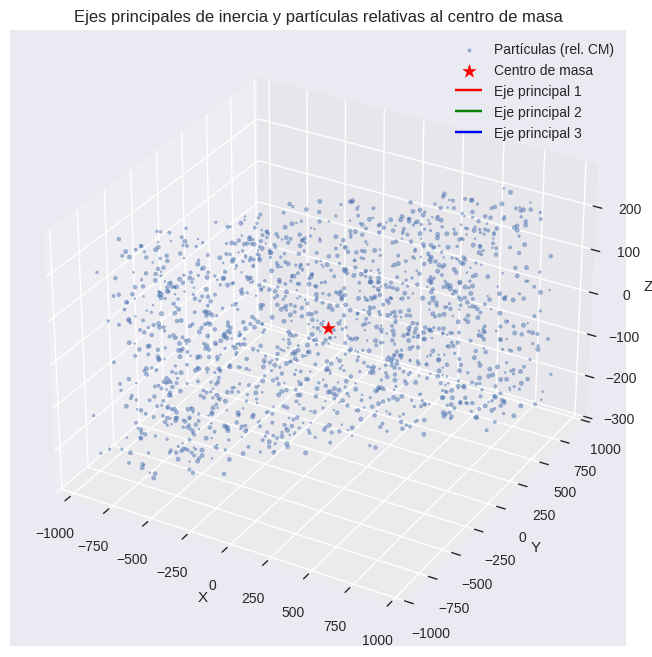

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Aunque no es estrictamente necesario en versiones recientes de matplotlib
import numpy as np

# Escalar los vectores de los ejes principales por los autovalores para visualización
eje1 = autovectores3[:, 0] * autovalores3[0]
eje2 = autovectores3[:, 1] * autovalores3[1]
eje3 = autovectores3[:, 2] * autovalores3[2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar partículas relativas al centro de masa
ax.scatter(x_rel, y_rel, z_rel, s=masas * 2, alpha=0.5, label='Partículas (rel. CM)')

# Graficar centro de masa en el origen (ya que las partículas están en coordenadas relativas)
ax.scatter(0, 0, 0, c='red', s=100, marker='*', label='Centro de masa')

# Graficar los ejes principales de inercia como vectores desde el origen
ax.quiver(0, 0, 0, eje1[0], eje1[1], eje1[2], color='r', length=1, normalize=True, label='Eje principal 1')
ax.quiver(0, 0, 0, eje2[0], eje2[1], eje2[2], color='g', length=1, normalize=True, label='Eje principal 2')
ax.quiver(0, 0, 0, eje3[0], eje3[1], eje3[2], color='b', length=1, normalize=True, label='Eje principal 3')

# Configuraciones adicionales del gráfico
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ejes principales de inercia y partículas relativas al centro de masa')
ax.legend()
ax.grid(True)

plt.show()


# Gráfico 3D de las particulas y su CM

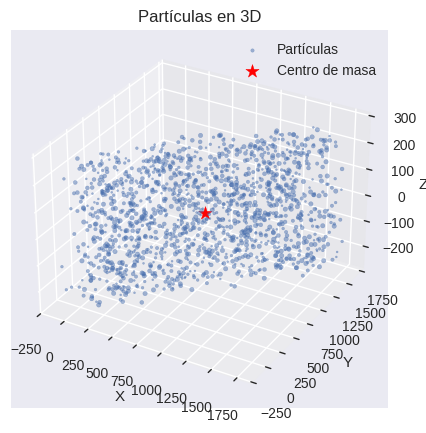

In [25]:

ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(x, y, z, s=masas*2, alpha=0.5, label='Partículas')
ax.scatter(x_cm, y_cm, z_cm, c='red', s=100, marker='*', label='Centro de masa')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Partículas en 3D')
plt.legend()
plt.tight_layout()
plt.show()


# Gráfica en 3D de los ejes principales de inercia

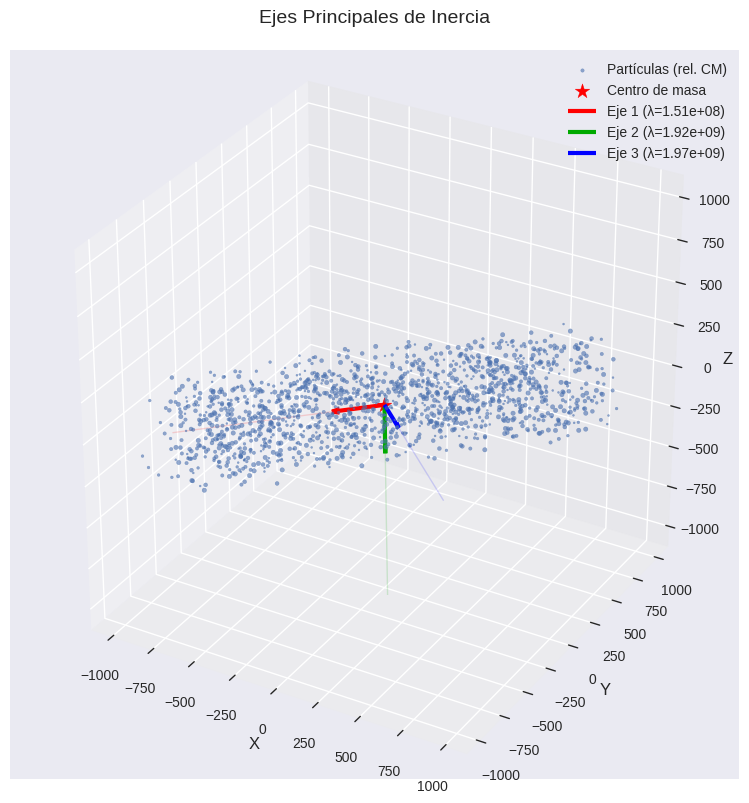

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configuración de estilo
plt.style.use('seaborn-v0_8')

# Crear figura solo para el gráfico 3D de ejes principales
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Calcular límites del sistema basados en las coordenadas relativas al CM
data_max = np.max([np.abs(x_rel).max(), np.abs(y_rel).max(), np.abs(z_rel).max()]) * 1.2

# Graficar partículas relativas al centro de masa
ax.scatter(x_rel, y_rel, z_rel, s=masas*2, alpha=0.6, label='Partículas (rel. CM)')

# Graficar centro de masa (origen en coordenadas relativas)
ax.scatter([0], [0], [0], color='red', s=120, marker='*', label='Centro de masa')

# Calcular longitud de ejes (25% del tamaño del sistema para mejor visualización)
axis_length = data_max * 0.25

# Graficar ejes principales con colores distintivos
colors = ['#FF0000', '#00AA00', '#0000FF']  # Rojo, Verde, Azul

for i, (val, vec) in enumerate(zip(autovalores3, [eje1, eje2, eje3])):
    # Normalizar la longitud del vector para visualización
    normalized_vec = vec / np.linalg.norm(vec) * axis_length

    # Graficar el eje principal con flecha
    ax.quiver(0, 0, 0,
              normalized_vec[0], normalized_vec[1], normalized_vec[2],
              color=colors[i], linewidth=3, arrow_length_ratio=0.15,
              label=f'Eje {i+1} (λ={val:.2e})')

    # Graficar línea tenue que cruza todo el espacio
    ax.quiver(0, 0, 0,
              normalized_vec[0]*4, normalized_vec[1]*4, normalized_vec[2]*4,
              color=colors[i], alpha=0.15, linewidth=1, arrow_length_ratio=0)

# Configuración de la vista 3D
ax.set_xlim(-data_max, data_max)
ax.set_ylim(-data_max, data_max)
ax.set_zlim(-data_max, data_max)
ax.set_box_aspect([1, 1, 1])  # Mantener relación de aspecto cúbica

# Etiquetas y título
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('Ejes Principales de Inercia', fontsize=14, pad=20)

# Leyenda y ajustes finales
ax.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

# Base cartesiana a base de autovectores en 3D




In [60]:
# Matriz identidad 3x3, que representa la base canónica estándar en R^3
c = np.zeros((3, 3))
c[0, 0] = 1
c[1, 1] = 1
c[2, 2] = 1

def matriz_cambio_base(B1, B2):
    """
    Calcula la matriz de cambio de base P que transforma coordenadas de la base B1 a la base B2.

    Parámetros:
    B1 : array o matriz (3x3) que representa la base origen (cada columna es un vector base)
    B2 : array o matriz (3x3) que representa la base destino (cada columna es un vector base)

    Retorna:
    P : matriz de cambio de base tal que para cualquier vector x,
        sus coordenadas en B2 se obtienen como [x]_B2 = P @ [x]_B1
    """

    M_B1 = B1                 # Matriz cuyas columnas son los vectores de la base origen
    M_B2 = np.linalg.inv(B2)  # Inversa de la matriz base destino

    # Multiplicamos la base origen por la inversa de la base destino para obtener la matriz de cambio
    P2 = M_B1 @ M_B2          # P2 transforma coordenadas de B1 a B2

    return P2

# Calcular la matriz de cambio de base desde la base canónica (c) a la base de autovectores
new_base = matriz_cambio_base(c, autovectores3)

# Imprimir la matriz de cambio (más intuitiva para visualizar las filas como vectores)
print("La matriz de cambio de base de los vectores cartesianos a la base de autovectores en 3D es: ")
print(new_base.T)


La matriz de cambio de base de los vectores cartesianos a la base de autovectores en 3D es: 
[[-0.70611307  0.04694255  0.70654139]
 [-0.70808985 -0.05190995 -0.7042117 ]
 [ 0.00361904 -0.99754787  0.06989384]]


# Base cartesiana a base de autovectores en 2D

In [61]:
# Matriz identidad 2x2, base canónica estándar en 2D
c2 = np.zeros((2, 2))
c2[0, 0] = 1
c2[1, 1] = 1

# Calcular la matriz de cambio de base desde la base canónica 2D (c2) a la base de autovectores 2D
base2D = matriz_cambio_base(c2, autovectores)

# Imprimir la  matriz de cambio de base para facilitar la lectura
print("La matriz de cambio de base de los vectores cartesianos a la base de autovectores en 2D es: ")
print(base2D.T)


La matriz de cambio de base de los vectores cartesianos a la base de autovectores en 2D es: 
[[-0.7061125  -0.70809967]
 [-0.70809967  0.7061125 ]]
